# Thesis Data

In [1]:
%run Numerical_SCE.py

           Parameter      Value                                        Description
0      Sample_Volume         25  Size of the Sample Container in the LISST 200X...
1                mld        100       Mixed Layer Depth/Fluid Thickness, Units: cm
2               Flow  Turbulent               Flow Regime: 'Laminar' or 'Turbulent
3                K_B        0.0                     Boltzmann Constant, Units: J/K
4          T_Celcius         20                       Input Temperature in Celcius
5               T_th     293.15                Thermodynamic Temperature, Units: K
6              rho_f      1.025  Fluid Density, Units: g/cm^3, Note: Dependent ...
7              rho_p        1.2  Diatom/Cocolithospheres Particle Density, Unit...
8                 mu      0.001  Dynamic Viscosity, Units: kg/(m*s), Note: Depe...
9                 nu   0.000001  Kinematic Viscosity, Units: m^2/s, Note: Depen...
10             gamma          1                         Shear Gradient, Units: 1/s
11  

## Kernel Plot To Use in the Thesis

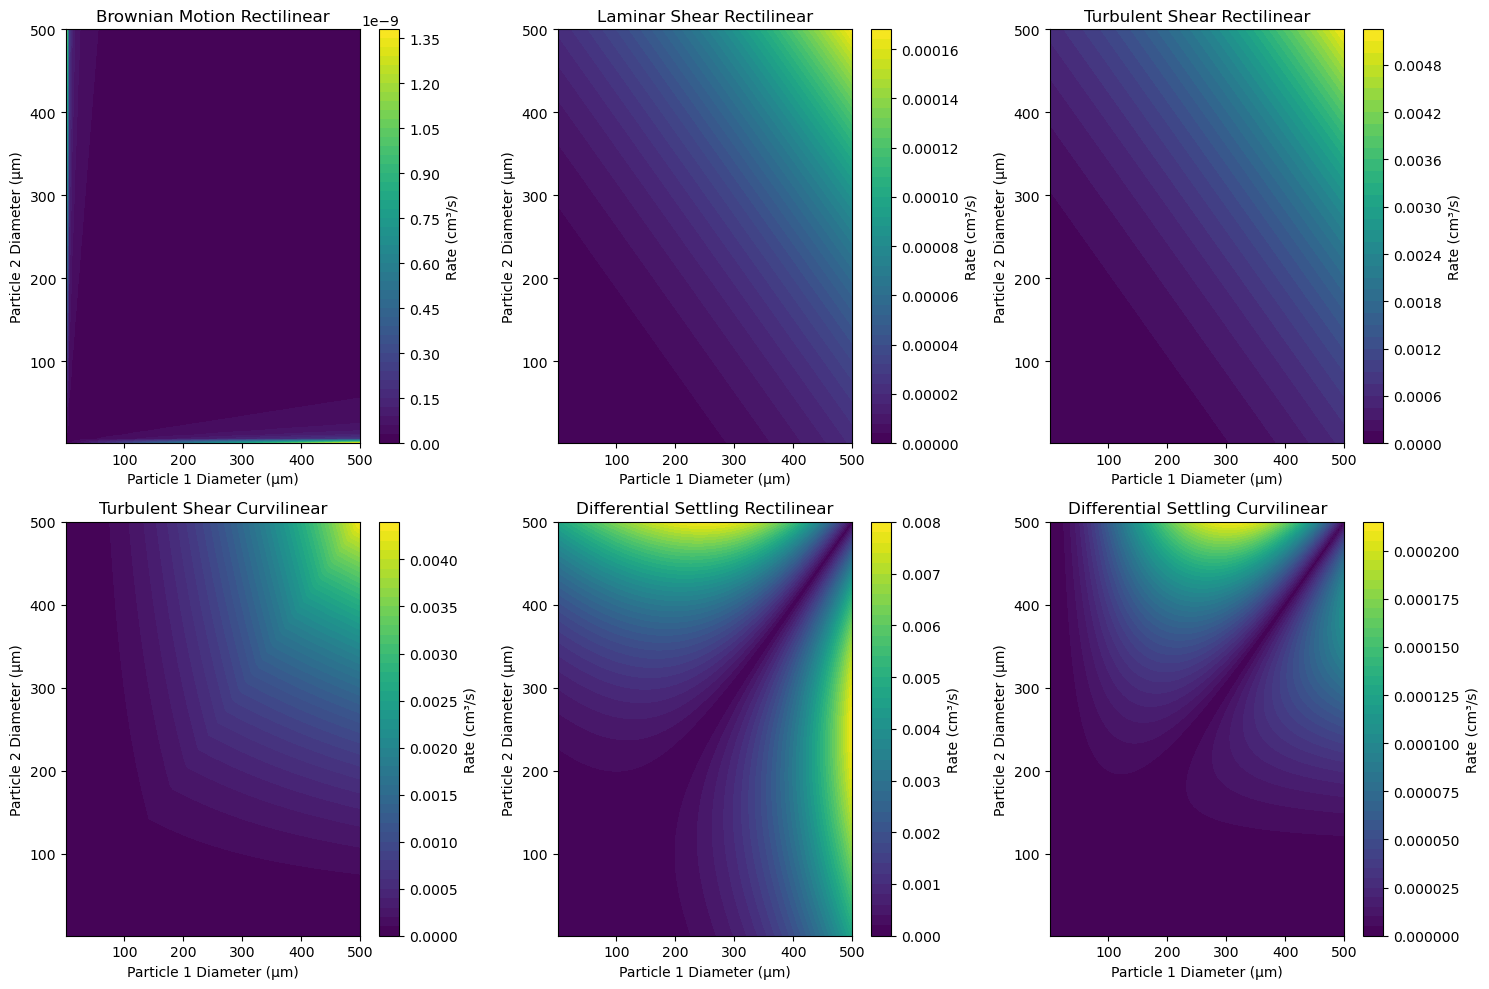

In [2]:
# Generate the particle diameters
P1Diameters = generate_diameters(100, 1, 500, 'um')
P2Diameters = generate_diameters(100, 1, 500, 'um')

# Calculate values for m1 and m2
m1_values = diameter2mass(np.array(P1Diameters))
m2_values = diameter2mass(np.array(P2Diameters))

# Calculate the kernel values
b_br_kernel_values = np.zeros((len(m1_values), len(m2_values)))
ls_r_kernel_values = np.zeros((len(m1_values), len(m2_values)))
ts_r_kernel_values = np.zeros((len(m1_values), len(m2_values)))
ts_c_kernel_values = np.zeros((len(m1_values), len(m2_values)))
ds_r_kernel_values = np.zeros((len(m1_values), len(m2_values)))
ds_c_kernel_values = np.zeros((len(m1_values), len(m2_values)))

for i in range(len(m1_values)):
    for j in range(len(m2_values)):
        b_br_kernel_values[i, j] = b_br(m1_values[i], m2_values[j])
        ls_r_kernel_values[i, j] = ls_r(m1_values[i], m2_values[j])
        ts_r_kernel_values[i, j] = ts_r(m1_values[i], m2_values[j])
        ts_c_kernel_values[i, j] = ts_c(m1_values[i], m2_values[j])
        ds_r_kernel_values[i, j] = ds_r(m1_values[i], m2_values[j])
        ds_c_kernel_values[i, j] = ds_c(m1_values[i], m2_values[j])

# Create the contourf plots
X, Y = np.meshgrid(P1Diameters * 10**4, P2Diameters* 10**4)
fig, ax = plt.subplots(2,3, figsize=(15, 10))

# Subplot 1 - Brownian Motion Rectilinear Kernel Contour Plot
contour = ax[0, 0].contourf(X, Y, b_br_kernel_values, levels=50, cmap='viridis')
cbar = fig.colorbar(contour, ax=ax[0, 0])
cbar.set_label('Rate (cm³/s)')
ax[0, 0].set_xlabel('Particle 1 Diameter (µm)')
ax[0, 0].set_ylabel('Particle 2 Diameter (µm)')
ax[0, 0].set_title('Brownian Motion Rectilinear')

# Subplot 2 - Laminar Shear Rectilinear Kernel Contour Plot
contour = ax[0, 1].contourf(X, Y, ls_r_kernel_values, levels=50, cmap='viridis')
cbar = fig.colorbar(contour, ax=ax[0, 1])
cbar.set_label('Rate (cm³/s)')
ax[0, 1].set_xlabel('Particle 1 Diameter (µm)')
ax[0, 1].set_ylabel('Particle 2 Diameter (µm)')
ax[0, 1].set_title('Laminar Shear Rectilinear')

# Subplot 3 - Turbulent Shear Rectilinear Kernel Contour Plot
contour = ax[0, 2].contourf(X, Y, ts_r_kernel_values, levels=50, cmap='viridis')
cbar = fig.colorbar(contour, ax=ax[0, 2])
cbar.set_label('Rate (cm³/s)')
ax[0, 2].set_xlabel('Particle 1 Diameter (µm)')
ax[0, 2].set_ylabel('Particle 2 Diameter (µm)')
ax[0, 2].set_title('Turbulent Shear Rectilinear')

# Subplot 4 - Turbulent Shear Curvilinear Kernel Contour Plot
contour = ax[1, 0].contourf(X, Y, ts_c_kernel_values, levels=50, cmap='viridis')
cbar = fig.colorbar(contour, ax=ax[1, 0])
cbar.set_label('Rate (cm³/s)')
ax[1, 0].set_xlabel('Particle 1 Diameter (µm)')
ax[1, 0].set_ylabel('Particle 2 Diameter (µm)')
ax[1, 0].set_title('Turbulent Shear Curvilinear')

# Subplot 5 - Differential Settling Rectilinear Kernel Contour Plot
contour = ax[1, 1].contourf(X, Y, ds_r_kernel_values, levels=50, cmap='viridis')
cbar = fig.colorbar(contour, ax=ax[1, 1])
cbar.set_label('Rate (cm³/s)')
ax[1, 1].set_xlabel('Particle 1 Diameter (µm)')
ax[1, 1].set_ylabel('Particle 2 Diameter (µm)')
ax[1, 1].set_title('Differential Settling Rectilinear')

# Subplot 6 - Differential Settling Curvilinear Kernel Contour Plot
contour = ax[1, 2].contourf(X, Y, ds_c_kernel_values, levels=50, cmap='viridis')
cbar = fig.colorbar(contour, ax=ax[1, 2])
cbar.set_label('Rate (cm³/s)')
ax[1, 2].set_xlabel('Particle 1 Diameter (µm)')
ax[1, 2].set_ylabel('Particle 2 Diameter (µm)')
ax[1, 2].set_title('Differential Settling Curvilinear')

plt.tight_layout()
plt.show()

## Creation of Initial Data Values

In [3]:
# Generate the particle diameters
diameters = generate_diameters(50, 1, 500, 'um') # 50 points between 1um and 500um
# Generate the mass domain
masses = generate_mass_domain(diameters)
# Mean and standard deviation of the normal distribution.
mean = 100e-4 # Centered at 100um
std_dev = 100e-4 # Standard deviation of 100um
# Define the initial number concentration of particles
ConstantInitialConcentration = np.ones_like(diameters) * 5000
def linear_y(x):
    return x
LinearInitialConcentration = linear_y(np.linspace(0, 5000, 50))
NormalInitialConcentration = 100 *  norm.pdf(diameters, mean, std_dev)
def trig_y(x):
    return (np.sin(x) + np.sin(3 * x) / 3 + 1) * 3000
TrigonometricInitialConcentration = trig_y(np.linspace(0, 6, 50))

# Solutions Dataframes & Plots

## Solutions

In [4]:
# Brownian Motion Rectilinear Kernel
ds_r_only_sol_df = SCE_Algorithm(masses, ConstantInitialConcentration, Kernel = 'ds', Type = 'rec',t_span = (0,3600*24),include_settling = False)



C:\Users\trivi\OneDrive\Documents\Rutgers\Grad 24 - Masters of Operational Oceanography\Research Thesis\Python Coding\Trivik Python Model\Model\Current Working Model\Model_Solver.py:43: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  gain_integral = integrate.quad(


In [5]:
ds_r_only_sol_df

,Number Concentration (1/cm3) at Mass 6.283e-13 g,Number Concentration (1/cm3) at Mass 8.789e-10 g,Number Concentration (1/cm3) at Mass 6.130e-09 g,Number Concentration (1/cm3) at Mass 1.973e-08 g,Number Concentration (1/cm3) at Mass 4.567e-08 g,Number Concentration (1/cm3) at Mass 8.793e-08 g,Number Concentration (1/cm3) at Mass 1.505e-07 g,Number Concentration (1/cm3) at Mass 2.373e-07 g,Number Concentration (1/cm3) at Mass 3.524e-07 g,Number Concentration (1/cm3) at Mass 4.998e-07 g,Number Concentration (1/cm3) at Mass 6.833e-07 g,Number Concentration (1/cm3) at Mass 9.071e-07 g,Number Concentration (1/cm3) at Mass 1.175e-06 g,Number Concentration (1/cm3) at Mass 1.491e-06 g,Number Concentration (1/cm3) at Mass 1.859e-06 g,Number Concentration (1/cm3) at Mass 2.284e-06 g,Number Concentration (1/cm3) at Mass 2.768e-06 g,Number Concentration (1/cm3) at Mass 3.317e-06 g,Number Concentration (1/cm3) at Mass 3.934e-06 g,Number Concentration (1/cm3) at Mass 4.622e-06 g,Number Concentration (1/cm3) at Mass 5.387e-06 g,Number Concentration (1/cm3) at Mass 6.232e-06 g,Number Concentration (1/cm3) at Mass 7.161e-06 g,Number Concentration (1/cm3) at Mass 8.178e-06 g,Number Concentration (1/cm3) at Mass 9.286e-06 g,Number Concentration (1/cm3) at Mass 1.049e-05 g,Number Concentration (1/cm3) at Mass 1.180e-05 g,Number Concentration (1/cm3) at Mass 1.320e-05 g,Number Concentration (1/cm3) at Mass 1.472e-05 g,Number Concentration (1/cm3) at Mass 1.635e-05 g,Number Concentration (1/cm3) at Mass 1.809e-05 g,Number Concentration (1/cm3) at Mass 1.996e-05 g,Number Concentration (1/cm3) at Mass 2.194e-05 g,Number Concentration (1/cm3) at Mass 2.406e-05 g,Number Concentration (1/cm3) at Mass 2.631e-05 g,Number Concentration (1/cm3) at Mass 2.869e-05 g,Number Concentration (1/cm3) at Mass 3.121e-05 g,Number Concentration (1/cm3) at Mass 3.388e-05 g,Number Concentration (1/cm3) at Mass 3.669e-05 g,Number Concentration (1/cm3) at Mass 3.966e-05 g,Number Concentration (1/cm3) at Mass 4.278e-05 g,Number Concentration (1/cm3) at Mass 4.606e-05 g,Number Concentration (1/cm3) at Mass 4.951e-05 g,Number Concentration (1/cm3) at Mass 5.312e-05 g,Number Concentration (1/cm3) at Mass 5.691e-05 g,Number Concentration (1/cm3) at Mass 6.087e-05 g,Number Concentration (1/cm3) at Mass 6.500e-05 g,Number Concentration (1/cm3) at Mass 6.933e-05 g,Number Concentration (1/cm3) at Mass 7.384e-05 g,Number Concentration (1/cm3) at Mass 7.854e-05 g
Time (s),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
0.101085,4999.599924,4.999581e+03,4.999562e+03,4.999544e+03,4.999525e+03,4.999507e+03,4.999489e+03,4.999472e+03,4.999455e+03,4.999440e+03,4.999424e+03,4.999410e+03,4.999397e+03,4.999385e+03,4.999374e+03,4.999365e+03,4.999357e+03,4.999350e+03,4.999346e+03,4.999343e+03,4.999342e+03,4.999343e+03,4.999347e+03,4.999352e+03,4.999361e+03,4.999371e+03,4.999385e+03,4.999401e+03,4.999420e+03,4.999441e+03,4.999466e+03,4.999494e+03,4.999525e+03,4.999559e+03,4.999596e+03,4.999636e+03,4.999679e+03,4.999725e+03,4.999774e+03,4.999825e+03,4999.879169,4999.935624,4999.994194,5000.054593,5000.116491,5000.179504,5000.243193,5000.307061,5000.370547,5000.433022
0.202170,4999.199874,4.999162e+03,4.999124e+03,4.999087e+03,4.999050e+03,4.999014e+03,4.998979e+03,4.998944e+03,4.998911e+03,4.998879e+03,4.998849e+03,4.998821e+03,4.998794e+03,4.998770e+03,4.99

In [6]:
AnimatedPSD(ds_r_only_sol_df, diameters, logscalex= False)

### Rectilinear

In [7]:
# Run the SCE Algorithm for the different initial conditions without settling.
Constantrec_sol_df = SCE_Algorithm(masses, ConstantInitialConcentration, Kernel = "all", Type = "rec", t_span = (0,3600*24),include_settling = False)
Linearrec_sol_df = SCE_Algorithm(masses, LinearInitialConcentration, Kernel = "all", Type = "rec", t_span = (0,3600*24),include_settling = False)
Normalrec_sol_df = SCE_Algorithm(masses, NormalInitialConcentration, Kernel = "all", Type = "rec", t_span = (0,3600*24),include_settling = False)
Trigonometricrec_sol_df = SCE_Algorithm(masses, TrigonometricInitialConcentration, Kernel = "all", Type = "rec", t_span = (0,3600*24),include_settling = False)

#Obtain The total masses from each solution set
C_mass_sums_rec = ((Constantrec_sol_df * masses).sum(axis=1)) 
L_mass_sums_rec = ((Linearrec_sol_df * masses).sum(axis=1)) 
N_mass_sums_rec = ((Normalrec_sol_df * masses).sum(axis=1)) 
T_mass_sums_rec = ((Trigonometricrec_sol_df * masses).sum(axis=1))

C:\Users\trivi\OneDrive\Documents\Rutgers\Grad 24 - Masters of Operational Oceanography\Research Thesis\Python Coding\Trivik Python Model\Model\Current Working Model\Model_Solver.py:43: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  gain_integral = integrate.quad(
C:\Users\trivi\OneDrive\Documents\Rutgers\Grad 24 - Masters of Operational Oceanography\Research Thesis\Python Coding\Trivik Python Model\Model\Current Working Model\Model_Solver.py:43: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  gain_integral = integrate.quad(
C:\Users\trivi\OneDrive\Documents\Rutgers\Grad 24 - Masters of Operational Oceanography\Research Thesis\Python Coding\Trivik Python Model\Model\Current Working Model\Model_Solver.py:43: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the p

### Curvilinear

In [8]:
# Run the SCE Algorithm for the different initial conditions without settling.
Constantcur_sol_df = SCE_Algorithm(masses, ConstantInitialConcentration, Kernel = "all", Type = "cur", t_span = (0,3600*24),include_settling = False)
Linearcur_sol_df = SCE_Algorithm(masses, LinearInitialConcentration, Kernel = "all", Type = "cur", t_span = (0,3600*24),include_settling = False)
Normalcur_sol_df = SCE_Algorithm(masses, NormalInitialConcentration, Kernel = "all", Type = "cur", t_span = (0,3600*24),include_settling = False)
Trigonometriccur_sol_df = SCE_Algorithm(masses, TrigonometricInitialConcentration, Kernel = "all", Type = "cur", t_span = (0,3600*24),include_settling = False)

#Obtain The total masses from each solution set
C_mass_sums_cur = ((Constantcur_sol_df * masses).sum(axis=1)) 
L_mass_sums_cur = ((Linearcur_sol_df * masses).sum(axis=1)) 
N_mass_sums_cur = ((Normalcur_sol_df * masses).sum(axis=1)) 
T_mass_sums_cur = ((Trigonometriccur_sol_df * masses).sum(axis=1))


## Plots

### Solution and Mass Plots Combined

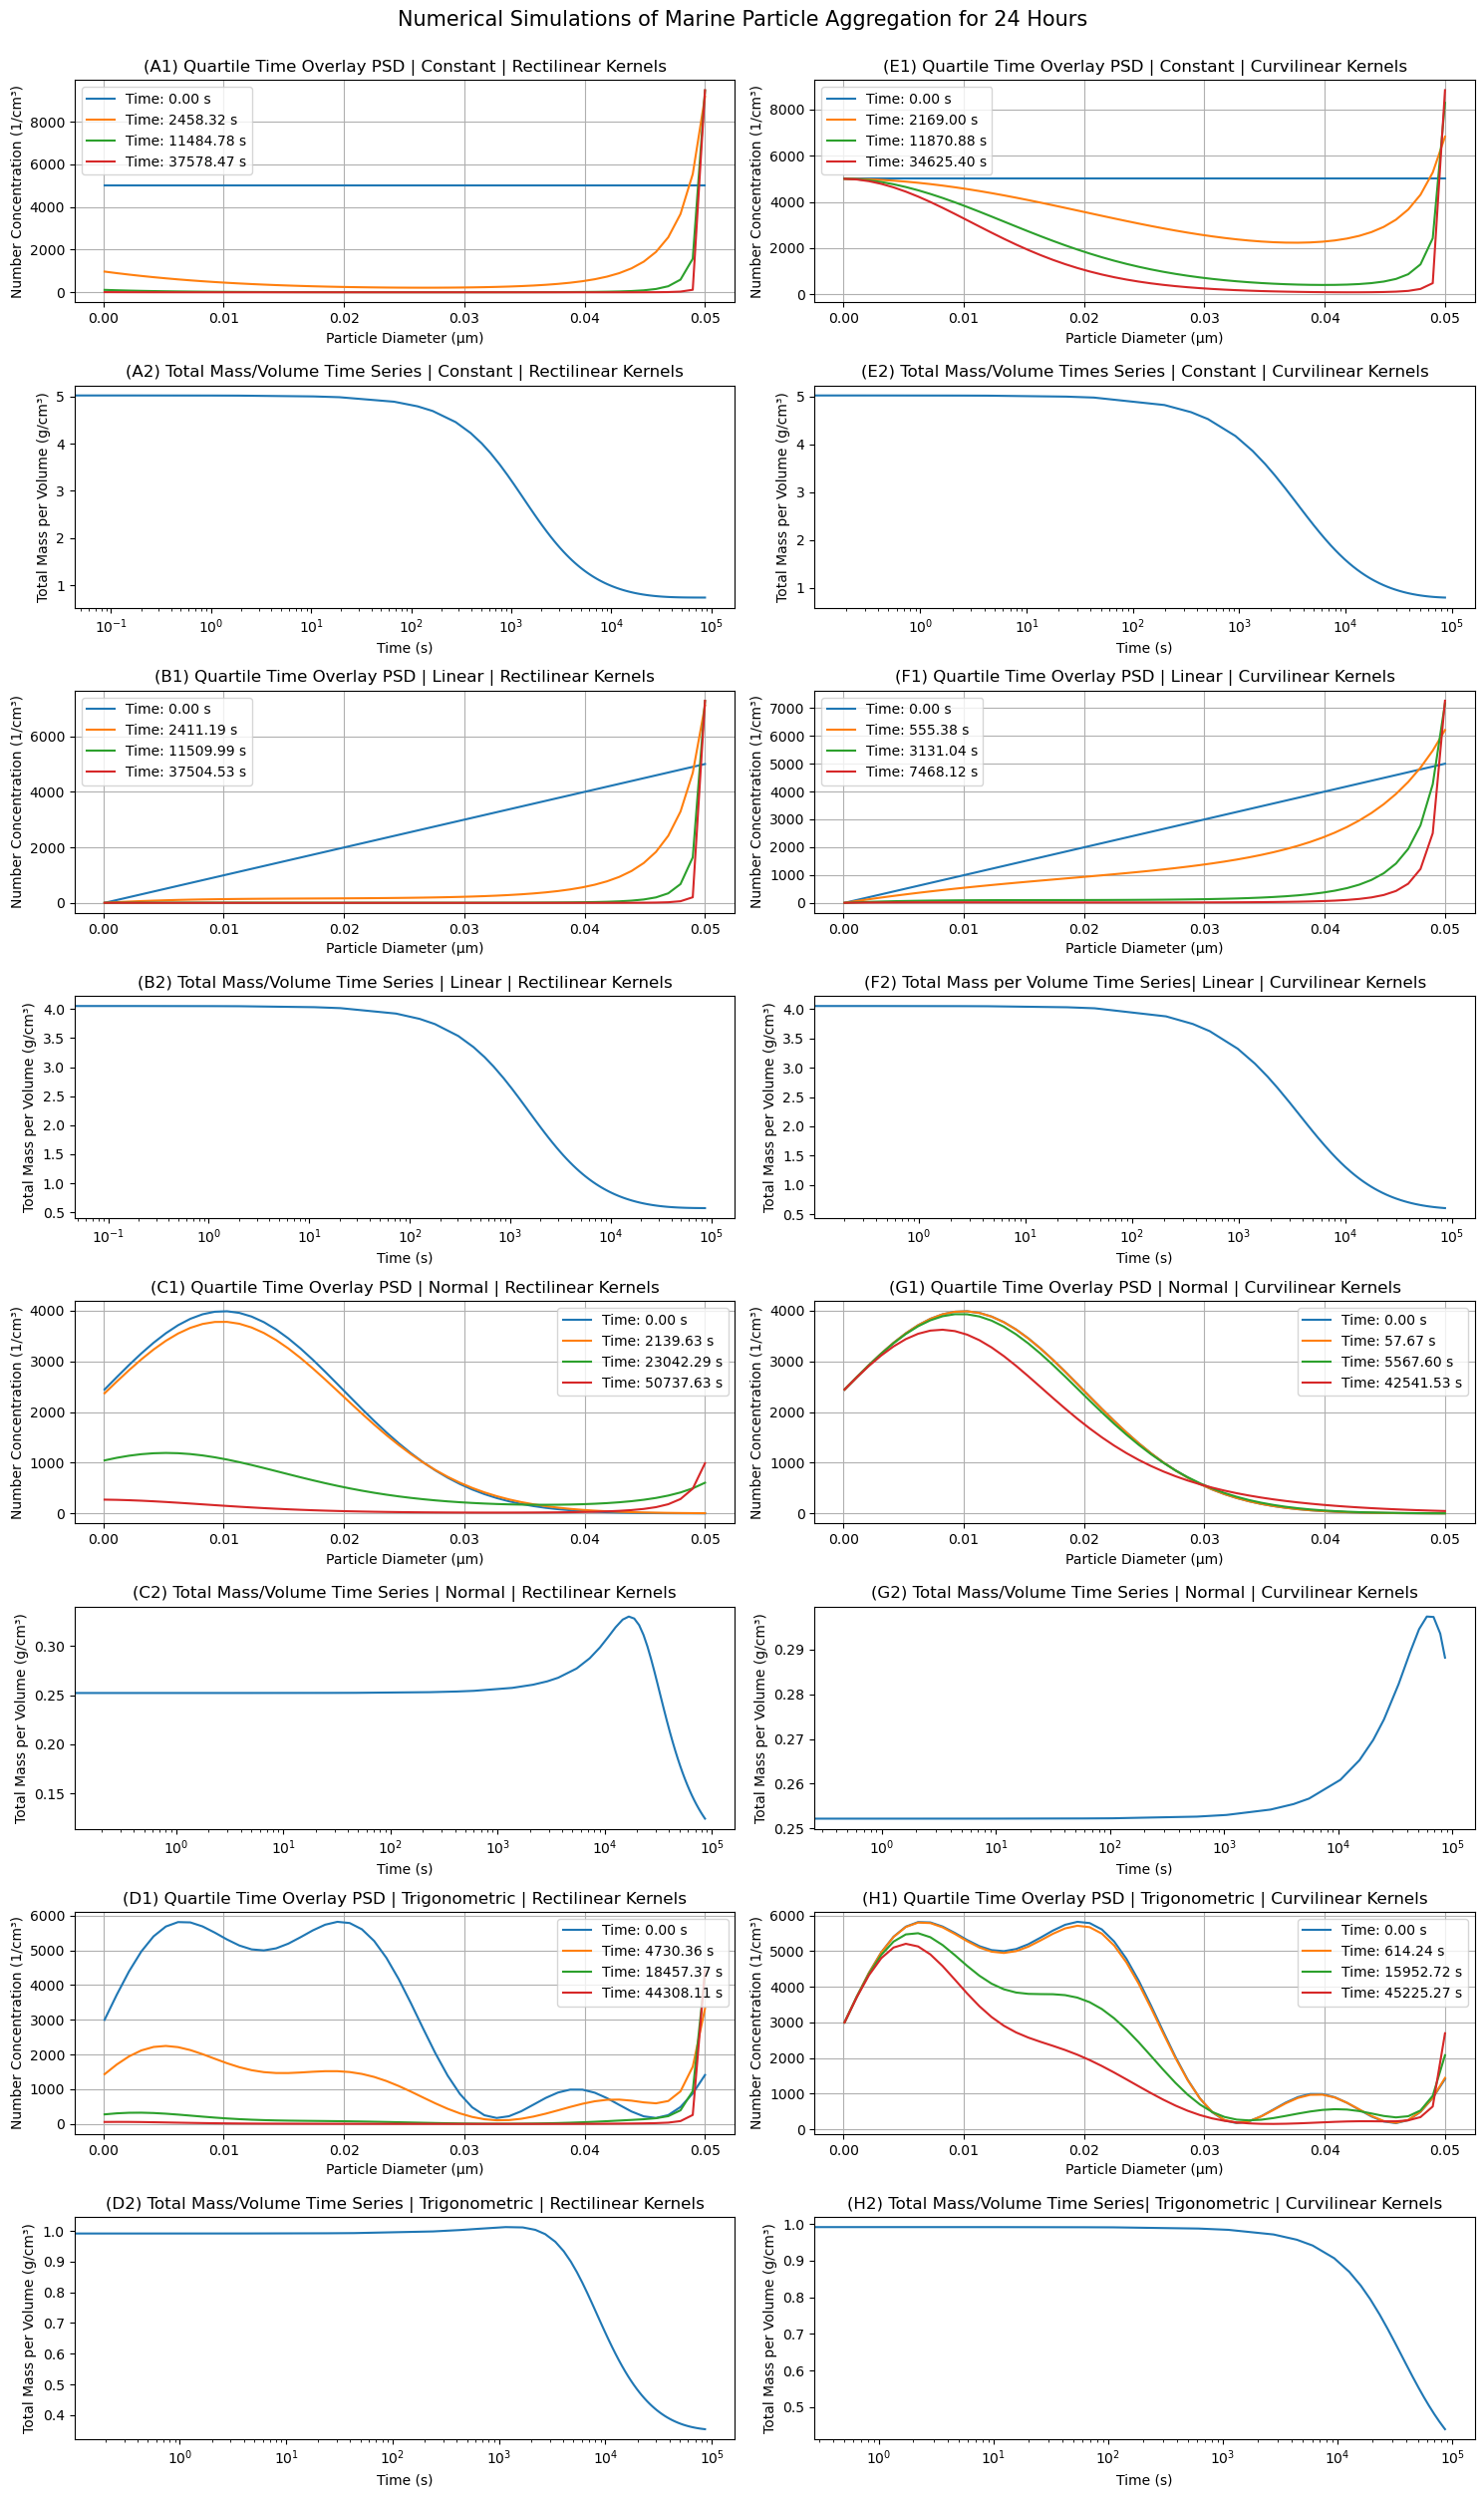

In [9]:
#diameters = diameters * 1e4 # Convert to micrometers for plotting

# Create the figure and axis
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

plt.suptitle('Numerical Simulations of Marine Particle Aggregation for 24 Hours', y = 1, fontsize = 15)

# Subplot One - Constant Initial Number Concentration of Particles Rectilinear
quartile_indices = [int(len(Constantrec_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Constantrec_sol_df.iloc[quartile_indices]
quartile_times = Constantrec_sol_df.index[quartile_indices]
 
# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[0, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[0, 0].set_title('(A1) Quartile Time Overlay PSD | Constant | Rectilinear Kernels')
ax[0, 0].set_xlabel('Particle Diameter (µm)')
ax[0, 0].set_ylabel('Number Concentration (1/cm³)')
ax[0, 0].legend()
ax[0, 0].grid()

# Subplot Two - Constant Initial Number Concentration of Particles Curvilinear
quartile_indices = [int(len(Constantcur_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Constantcur_sol_df.iloc[quartile_indices]
quartile_times = Constantcur_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[0, 1].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[0, 1].set_title('(E1) Quartile Time Overlay PSD | Constant | Curvilinear Kernels')
ax[0, 1].set_xlabel('Particle Diameter (µm)')
ax[0, 1].set_ylabel('Number Concentration (1/cm³)')
ax[0, 1].legend()
ax[0, 1].grid()

#Subplot Three - Constant mass Rectilinear
ax[1,0].plot(Constantrec_sol_df.index, C_mass_sums_rec)
ax[1,0].set_xlabel('Time (s)')
ax[1,0].set_xscale('log')
ax[1,0].set_ylabel('Total Mass per Volume (g/cm³)')
ax[1,0].set_title('(A2) Total Mass/Volume Time Series | Constant | Rectilinear Kernels')

#Subplot Four - Constant mass with Curvilinear
ax[1,1].plot(Constantcur_sol_df.index, C_mass_sums_cur)
ax[1,1].set_xlabel('Time (s)')
ax[1,1].set_xscale('log')
ax[1,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[1,1].set_title('(E2) Total Mass/Volume Times Series | Constant | Curvilinear Kernels')

# Subplot Five - Linear Initial Number Concentration of Particles Rectilinear
quartile_indices = [int(len(Linearrec_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Linearrec_sol_df.iloc[quartile_indices]
quartile_times = Linearrec_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[2, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[2, 0].set_title('(B1) Quartile Time Overlay PSD | Linear | Rectilinear Kernels')
ax[2, 0].set_xlabel('Particle Diameter (µm)')
ax[2, 0].set_ylabel('Number Concentration (1/cm³)')
ax[2, 0].legend()
ax[2, 0].grid()

# Subplot Six - Linear Initial Number Concentration of Particles Curvilinear
quartile_indices = [int(len(Linearcur_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Linearrec_sol_df.iloc[quartile_indices]
quartile_times = Linearrec_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[2, 1].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[2, 1].set_title('(F1) Quartile Time Overlay PSD | Linear | Curvilinear Kernels')
ax[2, 1].set_xlabel('Particle Diameter (µm)')
ax[2, 1].set_ylabel('Number Concentration (1/cm³)')
ax[2, 1].legend()
ax[2, 1].grid()

#Subplot Seven - Linear mass Rectilinear
ax[3,0].plot(Linearrec_sol_df.index, L_mass_sums_rec)
ax[3,0].set_xlabel('Time (s)')
ax[3,0].set_xscale('log')
ax[3,0].set_ylabel('Total Mass per Volume (g/cm³)')
ax[3,0].set_title('(B2) Total Mass/Volume Time Series | Linear | Rectilinear Kernels')

#Subplot Eight - Linear mass Curvilinear
ax[3,1].plot(Linearcur_sol_df.index, L_mass_sums_cur)
ax[3,1].set_xlabel('Time (s)')
ax[3,1].set_xscale('log')
ax[3,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[3,1].set_title('(F2) Total Mass per Volume Time Series| Linear | Curvilinear Kernels')

# Subplot Nine - Normal Initial Number Concentration of Particles Rectilinear
quartile_indices = [int(len(Normalrec_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Normalrec_sol_df.iloc[quartile_indices]
quartile_times = Normalrec_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[4, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[4, 0].set_title('(C1) Quartile Time Overlay PSD | Normal | Rectilinear Kernels')
ax[4, 0].set_xlabel('Particle Diameter (µm)')
ax[4, 0].set_ylabel('Number Concentration (1/cm³)')
ax[4, 0].legend()
ax[4, 0].grid()

# Subplot Ten - Normal Initial Number Concentration of Particles Curvilinear
quartile_indices = [int(len(Normalcur_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Normalcur_sol_df.iloc[quartile_indices]
quartile_times = Normalcur_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[4, 1].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[4, 1].set_title('(G1) Quartile Time Overlay PSD | Normal | Curvilinear Kernels')
ax[4, 1].set_xlabel('Particle Diameter (µm)')
ax[4, 1].set_ylabel('Number Concentration (1/cm³)')
ax[4, 1].legend()
ax[4, 1].grid()

#Subplot Eleven - Normal mass Rectilinear
ax[5,0].plot(Normalrec_sol_df.index, N_mass_sums_rec)
ax[5,0].set_xlabel('Time (s)')
ax[5,0].set_xscale('log')
ax[5,0].set_ylabel('Total Mass per Volume (g/cm³)')
ax[5,0].set_title('(C2) Total Mass/Volume Time Series | Normal | Rectilinear Kernels')

#Subplot Twelve - Normal mass Curvilinear
ax[5,1].plot(Normalcur_sol_df.index, N_mass_sums_cur)
ax[5,1].set_xlabel('Time (s)')
ax[5,1].set_xscale('log')
ax[5,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[5,1].set_title('(G2) Total Mass/Volume Time Series | Normal | Curvilinear Kernels')

# Subplot Thriteen - Trigonometric Initial Number Concentration of Particles Rectilinear
quartile_indices = [int(len(Trigonometricrec_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Trigonometricrec_sol_df.iloc[quartile_indices]
quartile_times = Trigonometricrec_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[6, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[6, 0].set_title('(D1) Quartile Time Overlay PSD | Trigonometric | Rectilinear Kernels')
ax[6, 0].set_xlabel('Particle Diameter (µm)')
ax[6, 0].set_ylabel('Number Concentration (1/cm³)')
ax[6, 0].legend()
ax[6, 0].grid()

# Subplot Fourteen - Trigonometric Initial Number Concentration of Particles Curvilinear
quartile_indices = [int(len(Trigonometriccur_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Trigonometriccur_sol_df.iloc[quartile_indices]
quartile_times = Trigonometriccur_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[6, 1].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[6, 1].set_title('(H1) Quartile Time Overlay PSD | Trigonometric | Curvilinear Kernels')
ax[6, 1].set_xlabel('Particle Diameter (µm)')
ax[6, 1].set_ylabel('Number Concentration (1/cm³)')
ax[6, 1].legend()
ax[6, 1].grid()

#Subplot Fifteen - Trigonometric mass Rectilinear
ax[7,0].plot(Trigonometricrec_sol_df.index, T_mass_sums_rec)
ax[7,0].set_xlabel('Time (s)')
ax[7,0].set_xscale('log')
ax[7,0].set_ylabel('Total Mass per Volume (g/cm³)')
ax[7,0].set_title('(D2) Total Mass/Volume Time Series | Trigonometric | Rectilinear Kernels')

#Subplot Sixteen - Trigonometric mass Curvilinear
ax[7,1].plot(Trigonometriccur_sol_df.index, T_mass_sums_cur)
ax[7,1].set_xlabel('Time (s)')
ax[7,1].set_xscale('log')
ax[7,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[7,1].set_title('(H2) Total Mass/Volume Time Series| Trigonometric | Curvilinear Kernels')

plt.tight_layout()

### Rectilinear Solutions and Their Respective Mass Plots Combined

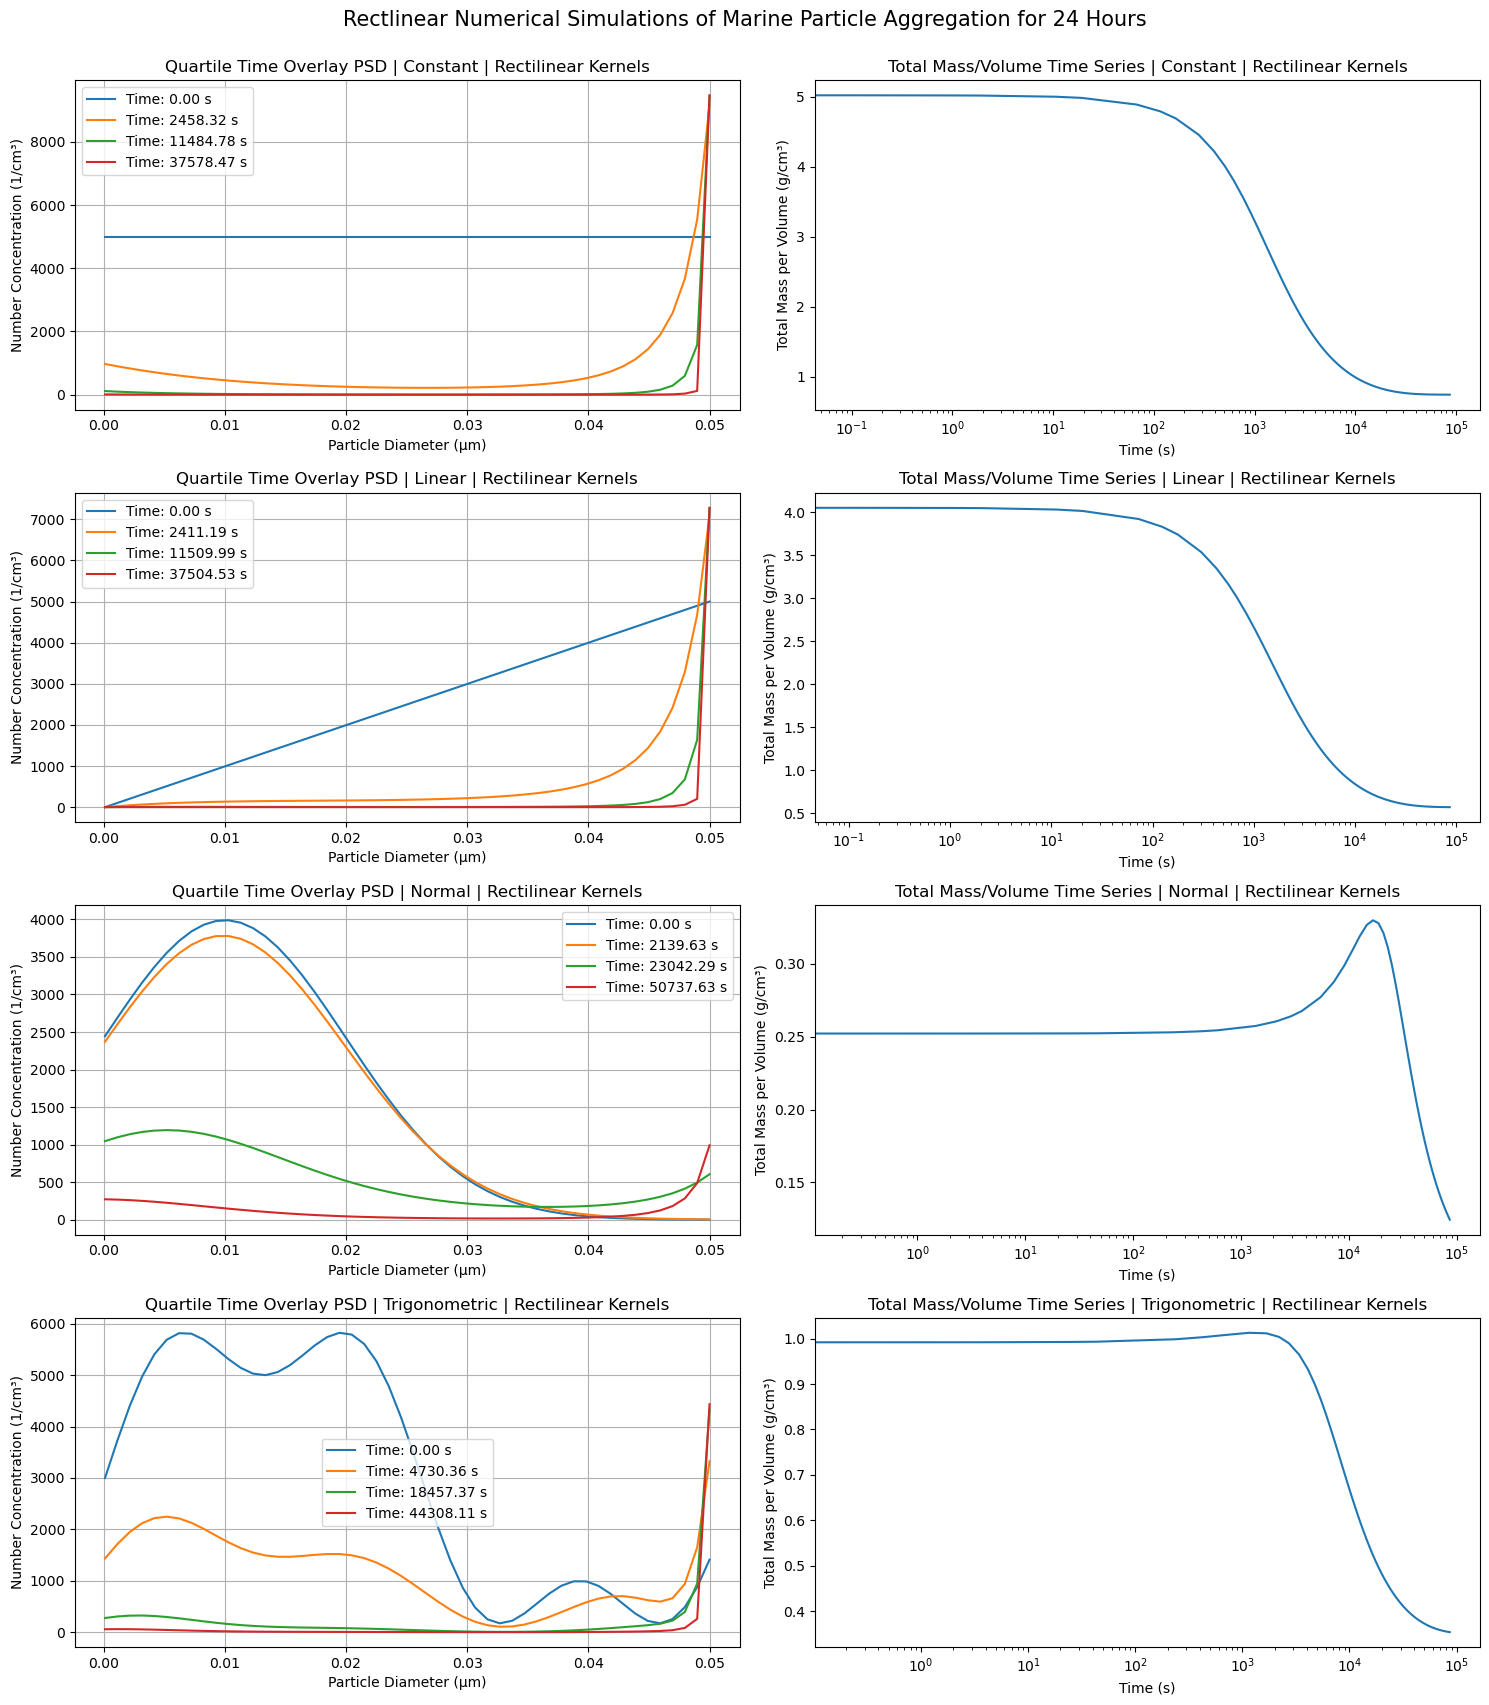

In [10]:
# Create the figure and axis
fig, ax = plt.subplots(4, 2, figsize=(15, 17))

plt.suptitle('Rectlinear Numerical Simulations of Marine Particle Aggregation for 24 Hours', y = 1, fontsize = 15)

# Subplot One - Constant Initial Number Concentration of Particles Rectilinear
quartile_indices = [int(len(Constantrec_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Constantrec_sol_df.iloc[quartile_indices]
quartile_times = Constantrec_sol_df.index[quartile_indices]
 
# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[0, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[0, 0].set_title('Quartile Time Overlay PSD | Constant | Rectilinear Kernels')
ax[0, 0].set_xlabel('Particle Diameter (µm)')
ax[0, 0].set_ylabel('Number Concentration (1/cm³)')
ax[0, 0].legend()
ax[0, 0].grid()

#Subplot Two - Constant mass Rectilinear
ax[0,1].plot(Constantrec_sol_df.index, C_mass_sums_rec)
ax[0,1].set_xlabel('Time (s)')
ax[0,1].set_xscale('log')
ax[0,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[0,1].set_title('Total Mass/Volume Time Series | Constant | Rectilinear Kernels')

# Subplot Three - Linear Initial Number Concentration of Particles Rectilinear
quartile_indices = [int(len(Linearrec_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Linearrec_sol_df.iloc[quartile_indices]
quartile_times = Linearrec_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[1, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[1, 0].set_title('Quartile Time Overlay PSD | Linear | Rectilinear Kernels')
ax[1, 0].set_xlabel('Particle Diameter (µm)')
ax[1, 0].set_ylabel('Number Concentration (1/cm³)')
ax[1, 0].legend()
ax[1, 0].grid()

#Subplot Four - Linear mass Rectilinear
ax[1,1].plot(Linearrec_sol_df.index, L_mass_sums_rec)
ax[1,1].set_xlabel('Time (s)')
ax[1,1].set_xscale('log')
ax[1,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[1,1].set_title('Total Mass/Volume Time Series | Linear | Rectilinear Kernels')

# Subplot Five - Normal Initial Number Concentration of Particles Rectilinear
quartile_indices = [int(len(Normalrec_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Normalrec_sol_df.iloc[quartile_indices]
quartile_times = Normalrec_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[2, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[2, 0].set_title('Quartile Time Overlay PSD | Normal | Rectilinear Kernels')
ax[2, 0].set_xlabel('Particle Diameter (µm)')
ax[2, 0].set_ylabel('Number Concentration (1/cm³)')
ax[2, 0].legend()
ax[2, 0].grid()

#Subplot Six - Normal mass Rectilinear
ax[2,1].plot(Normalrec_sol_df.index, N_mass_sums_rec)
ax[2,1].set_xlabel('Time (s)')
ax[2,1].set_xscale('log')
ax[2,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[2,1].set_title('Total Mass/Volume Time Series | Normal | Rectilinear Kernels')

# Subplot Seven - Trigonometric Initial Number Concentration of Particles Rectilinear
quartile_indices = [int(len(Trigonometricrec_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Trigonometricrec_sol_df.iloc[quartile_indices]
quartile_times = Trigonometricrec_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[3, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[3, 0].set_title('Quartile Time Overlay PSD | Trigonometric | Rectilinear Kernels')
ax[3, 0].set_xlabel('Particle Diameter (µm)')
ax[3, 0].set_ylabel('Number Concentration (1/cm³)')
ax[3, 0].legend()
ax[3, 0].grid()

#Subplot Eight - Trigonometric mass Rectilinear
ax[3,1].plot(Trigonometricrec_sol_df.index, T_mass_sums_rec)
ax[3,1].set_xlabel('Time (s)')
ax[3,1].set_xscale('log')
ax[3,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[3,1].set_title('Total Mass/Volume Time Series | Trigonometric | Rectilinear Kernels')

plt.tight_layout()
plt.show()

### Curvilinear Solutions and Their Respective Mass Plots Combined

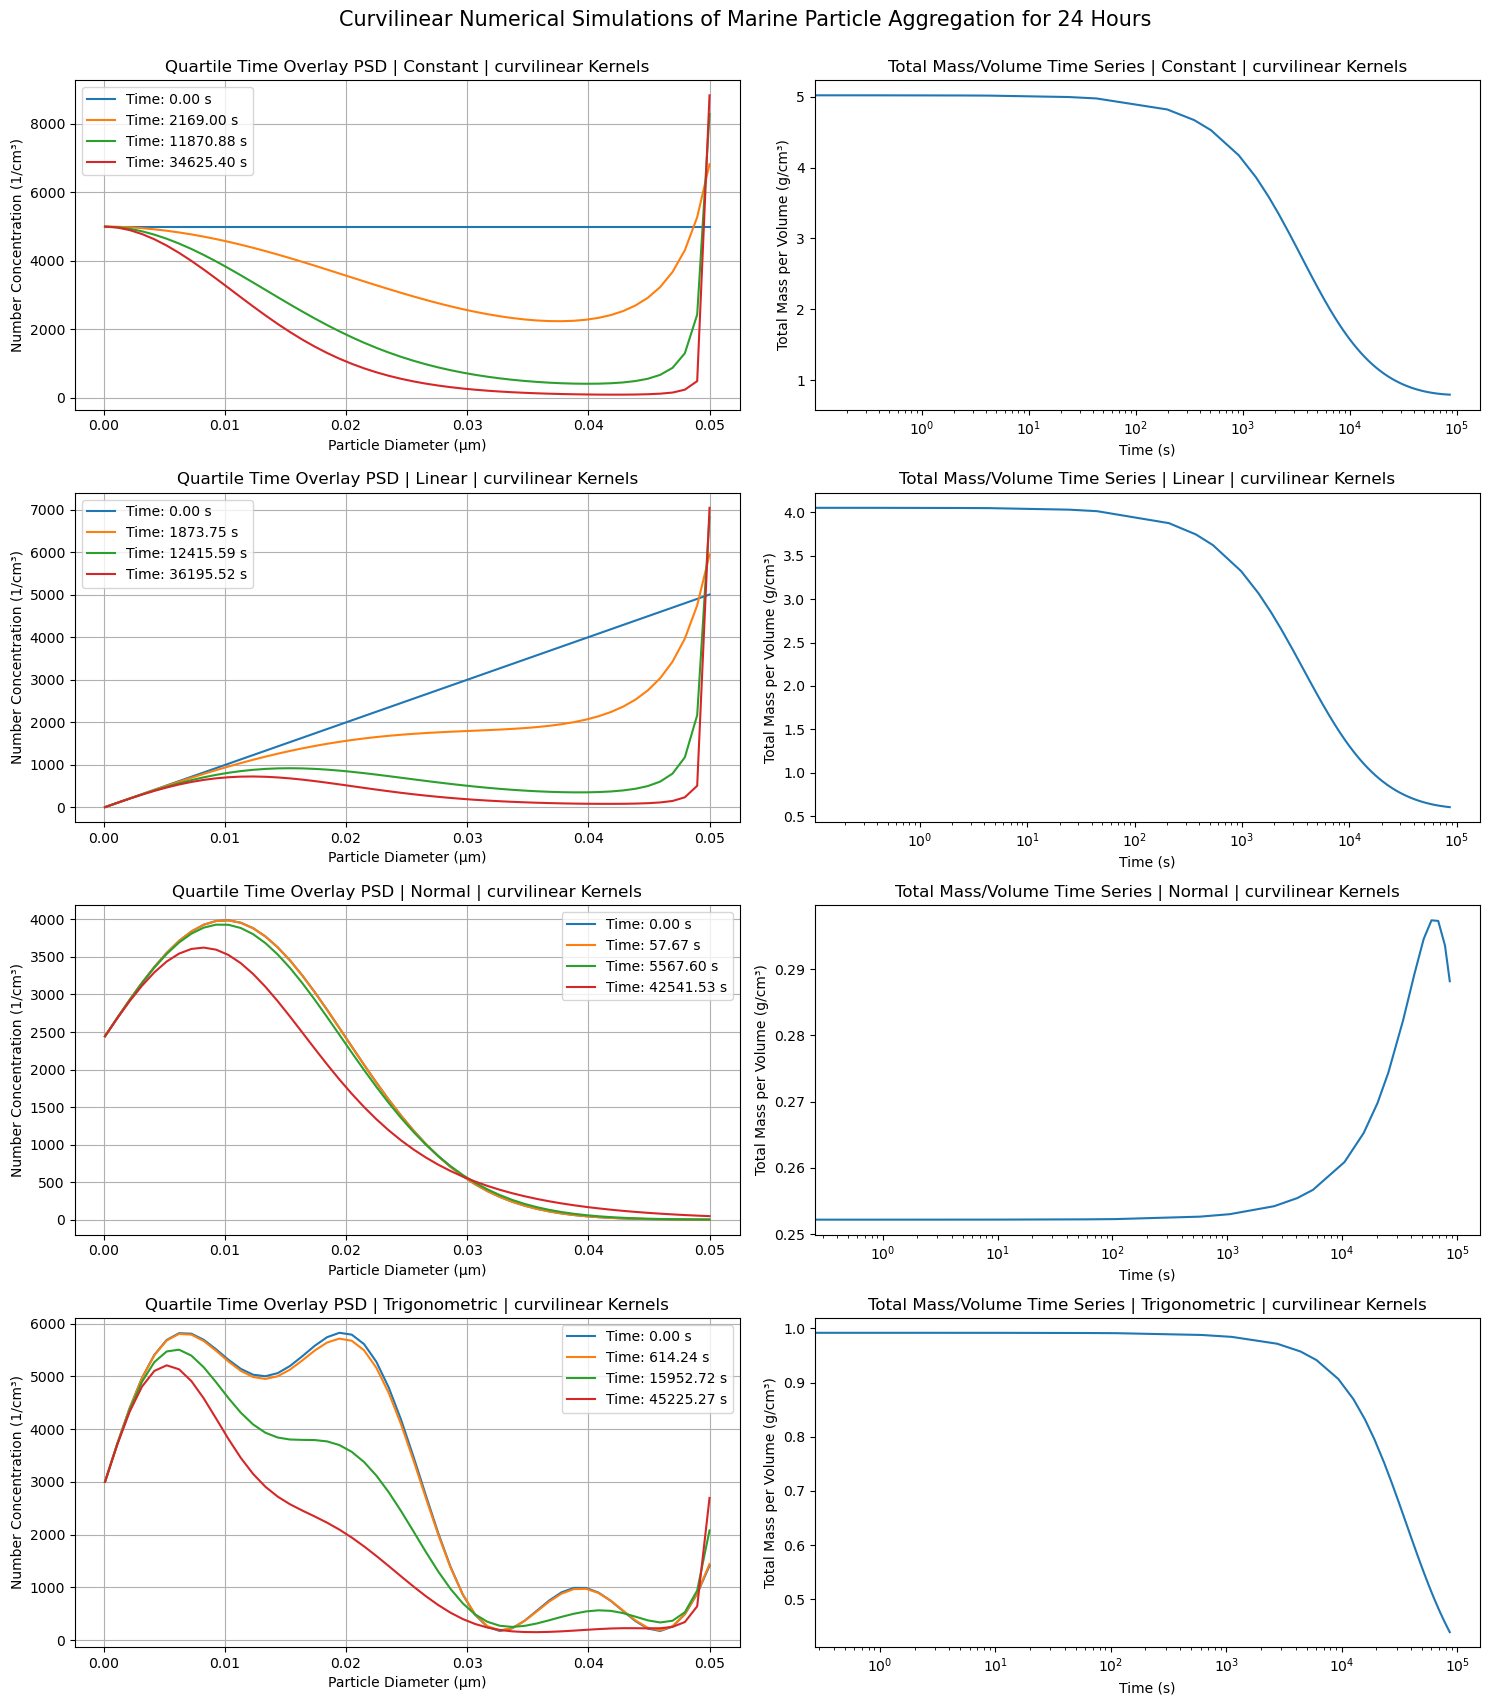

In [11]:
# Create the figure and axis
fig, ax = plt.subplots(4, 2, figsize=(15, 17))

plt.suptitle('Curvilinear Numerical Simulations of Marine Particle Aggregation for 24 Hours', y = 1, fontsize = 15)

# Subplot One - Constant Initial Number Concentration of Particles curvilinear
quartile_indices = [int(len(Constantcur_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Constantcur_sol_df.iloc[quartile_indices]
quartile_times = Constantcur_sol_df.index[quartile_indices]
 
# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[0, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[0, 0].set_title('Quartile Time Overlay PSD | Constant | curvilinear Kernels')
ax[0, 0].set_xlabel('Particle Diameter (µm)')
ax[0, 0].set_ylabel('Number Concentration (1/cm³)')
ax[0, 0].legend()
ax[0, 0].grid()

#Subplot Two - Constant mass curtilinear
ax[0,1].plot(Constantcur_sol_df.index, C_mass_sums_cur)
ax[0,1].set_xlabel('Time (s)')
ax[0,1].set_xscale('log')
ax[0,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[0,1].set_title('Total Mass/Volume Time Series | Constant | curvilinear Kernels')

# Subplot Three - Linear Initial Number Concentration of Particles curvilinear
quartile_indices = [int(len(Linearcur_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Linearcur_sol_df.iloc[quartile_indices]
quartile_times = Linearcur_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[1, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[1, 0].set_title('Quartile Time Overlay PSD | Linear | curvilinear Kernels')
ax[1, 0].set_xlabel('Particle Diameter (µm)')
ax[1, 0].set_ylabel('Number Concentration (1/cm³)')
ax[1, 0].legend()
ax[1, 0].grid()

#Subplot Four - Linear mass curtilinear
ax[1,1].plot(Linearcur_sol_df.index, L_mass_sums_cur)
ax[1,1].set_xlabel('Time (s)')
ax[1,1].set_xscale('log')
ax[1,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[1,1].set_title('Total Mass/Volume Time Series | Linear | curvilinear Kernels')

# Subplot Five - Normal Initial Number Concentration of Particles curvilinear
quartile_indices = [int(len(Normalcur_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Normalcur_sol_df.iloc[quartile_indices]
quartile_times = Normalcur_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[2, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[2, 0].set_title('Quartile Time Overlay PSD | Normal | curvilinear Kernels')
ax[2, 0].set_xlabel('Particle Diameter (µm)')
ax[2, 0].set_ylabel('Number Concentration (1/cm³)')
ax[2, 0].legend()
ax[2, 0].grid()

#Subplot Six - Normal mass curtilinear
ax[2,1].plot(Normalcur_sol_df.index, N_mass_sums_cur)
ax[2,1].set_xlabel('Time (s)')
ax[2,1].set_xscale('log')
ax[2,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[2,1].set_title('Total Mass/Volume Time Series | Normal | curvilinear Kernels')

# Subplot Seven - Trigonometric Initial Number Concentration of Particles curvilinear
quartile_indices = [int(len(Trigonometriccur_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Trigonometriccur_sol_df.iloc[quartile_indices]
quartile_times = Trigonometriccur_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[3, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[3, 0].set_title('Quartile Time Overlay PSD | Trigonometric | curvilinear Kernels')
ax[3, 0].set_xlabel('Particle Diameter (µm)')
ax[3, 0].set_ylabel('Number Concentration (1/cm³)')
ax[3, 0].legend()
ax[3, 0].grid()

#Subplot Eight - Trigonometric mass curvilinear
ax[3,1].plot(Trigonometriccur_sol_df.index, T_mass_sums_cur)
ax[3,1].set_xlabel('Time (s)')
ax[3,1].set_xscale('log')
ax[3,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[3,1].set_title('Total Mass/Volume Time Series | Trigonometric | curvilinear Kernels')

plt.tight_layout()
plt.show()

### Solution Plots Only

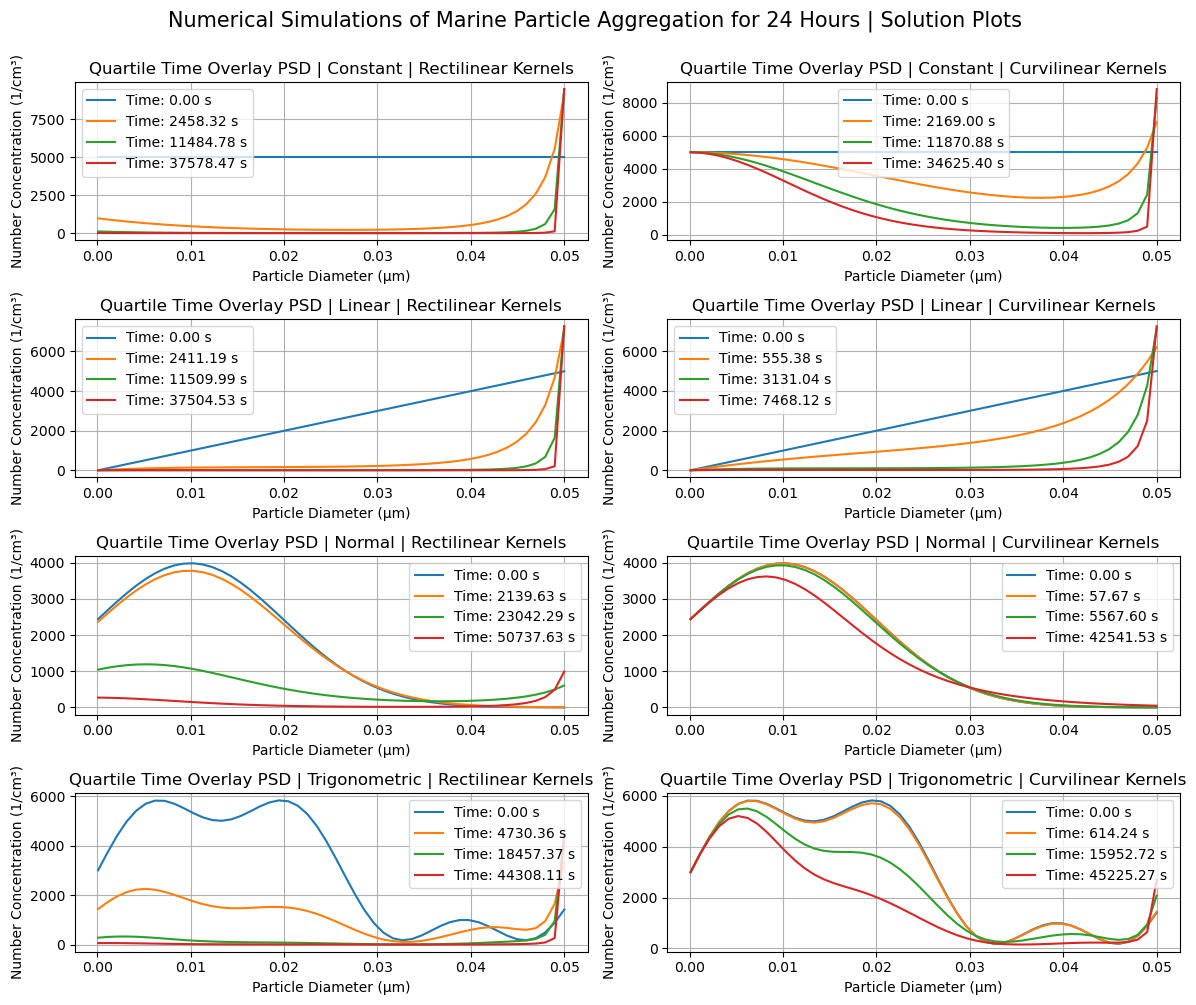

In [12]:
#diameters = diameters * 1e4 # Convert to micrometers for plotting

# Create the figure and axis
fig, ax = plt.subplots(4, 2, figsize=(12, 10))

plt.suptitle('Numerical Simulations of Marine Particle Aggregation for 24 Hours | Solution Plots', y = 1, fontsize = 15)

# Subplot One - Constant Initial Number Concentration of Particles Rectilinear
quartile_indices = [int(len(Constantrec_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Constantrec_sol_df.iloc[quartile_indices]
quartile_times = Constantrec_sol_df.index[quartile_indices]
 
# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[0, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[0, 0].set_title('Quartile Time Overlay PSD | Constant | Rectilinear Kernels')
ax[0, 0].set_xlabel('Particle Diameter (µm)')
ax[0, 0].set_ylabel('Number Concentration (1/cm³)')
ax[0, 0].legend()
ax[0, 0].grid()

# Subplot Two - Constant Initial Number Concentration of Particles Curvilinear
quartile_indices = [int(len(Constantcur_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Constantcur_sol_df.iloc[quartile_indices]
quartile_times = Constantcur_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[0, 1].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[0, 1].set_title('Quartile Time Overlay PSD | Constant | Curvilinear Kernels')
ax[0, 1].set_xlabel('Particle Diameter (µm)')
ax[0, 1].set_ylabel('Number Concentration (1/cm³)')
ax[0, 1].legend()
ax[0, 1].grid()

# Subplot Three - Linear Initial Number Concentration of Particles Rectilinear
quartile_indices = [int(len(Linearrec_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Linearrec_sol_df.iloc[quartile_indices]
quartile_times = Linearrec_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[1, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[1, 0].set_title('Quartile Time Overlay PSD | Linear | Rectilinear Kernels')
ax[1, 0].set_xlabel('Particle Diameter (µm)')
ax[1, 0].set_ylabel('Number Concentration (1/cm³)')
ax[1, 0].legend()
ax[1, 0].grid()

# Subplot Four - Linear Initial Number Concentration of Particles Curvilinear
quartile_indices = [int(len(Linearcur_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Linearrec_sol_df.iloc[quartile_indices]
quartile_times = Linearrec_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[1, 1].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[1, 1].set_title('Quartile Time Overlay PSD | Linear | Curvilinear Kernels')
ax[1, 1].set_xlabel('Particle Diameter (µm)')
ax[1, 1].set_ylabel('Number Concentration (1/cm³)')
ax[1, 1].legend()
ax[1, 1].grid()


# Subplot Five - Normal Initial Number Concentration of Particles Rectilinear
quartile_indices = [int(len(Normalrec_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Normalrec_sol_df.iloc[quartile_indices]
quartile_times = Normalrec_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[2, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[2, 0].set_title('Quartile Time Overlay PSD | Normal | Rectilinear Kernels')
ax[2, 0].set_xlabel('Particle Diameter (µm)')
ax[2, 0].set_ylabel('Number Concentration (1/cm³)')
ax[2, 0].legend()
ax[2, 0].grid()

# Subplot Six - Normal Initial Number Concentration of Particles Curvilinear
quartile_indices = [int(len(Normalcur_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Normalcur_sol_df.iloc[quartile_indices]
quartile_times = Normalcur_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[2, 1].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[2, 1].set_title('Quartile Time Overlay PSD | Normal | Curvilinear Kernels')
ax[2, 1].set_xlabel('Particle Diameter (µm)')
ax[2, 1].set_ylabel('Number Concentration (1/cm³)')
ax[2, 1].legend()
ax[2, 1].grid()

# Subplot Seven - Trigonometric Initial Number Concentration of Particles Rectilinear
quartile_indices = [int(len(Trigonometricrec_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Trigonometricrec_sol_df.iloc[quartile_indices]
quartile_times = Trigonometricrec_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[3, 0].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[3, 0].set_title('Quartile Time Overlay PSD | Trigonometric | Rectilinear Kernels')
ax[3, 0].set_xlabel('Particle Diameter (µm)')
ax[3, 0].set_ylabel('Number Concentration (1/cm³)')
ax[3, 0].legend()
ax[3, 0].grid()

# Subplot Eight - Trigonometric Initial Number Concentration of Particles Curvilinear
quartile_indices = [int(len(Trigonometriccur_sol_df) * q) for q in [0, 0.25, 0.5, 0.75]]

# Extract the quartile data
quartile_data = Trigonometriccur_sol_df.iloc[quartile_indices]
quartile_times = Trigonometriccur_sol_df.index[quartile_indices]

# Create the plot
for i, (index, time) in enumerate(zip(quartile_indices, quartile_times)):
    ax[3, 1].plot(diameters, quartile_data.iloc[i], label=f'Time: {time:.2f} s')

ax[3, 1].set_title('Quartile Time Overlay PSD | Trigonometric | Curvilinear Kernels')
ax[3, 1].set_xlabel('Particle Diameter (µm)')
ax[3, 1].set_ylabel('Number Concentration (1/cm³)')
ax[3, 1].legend()
ax[3, 1].grid()

plt.tight_layout()

#### Mass Plots Only

<function matplotlib.pyplot.show(close=None, block=None)>

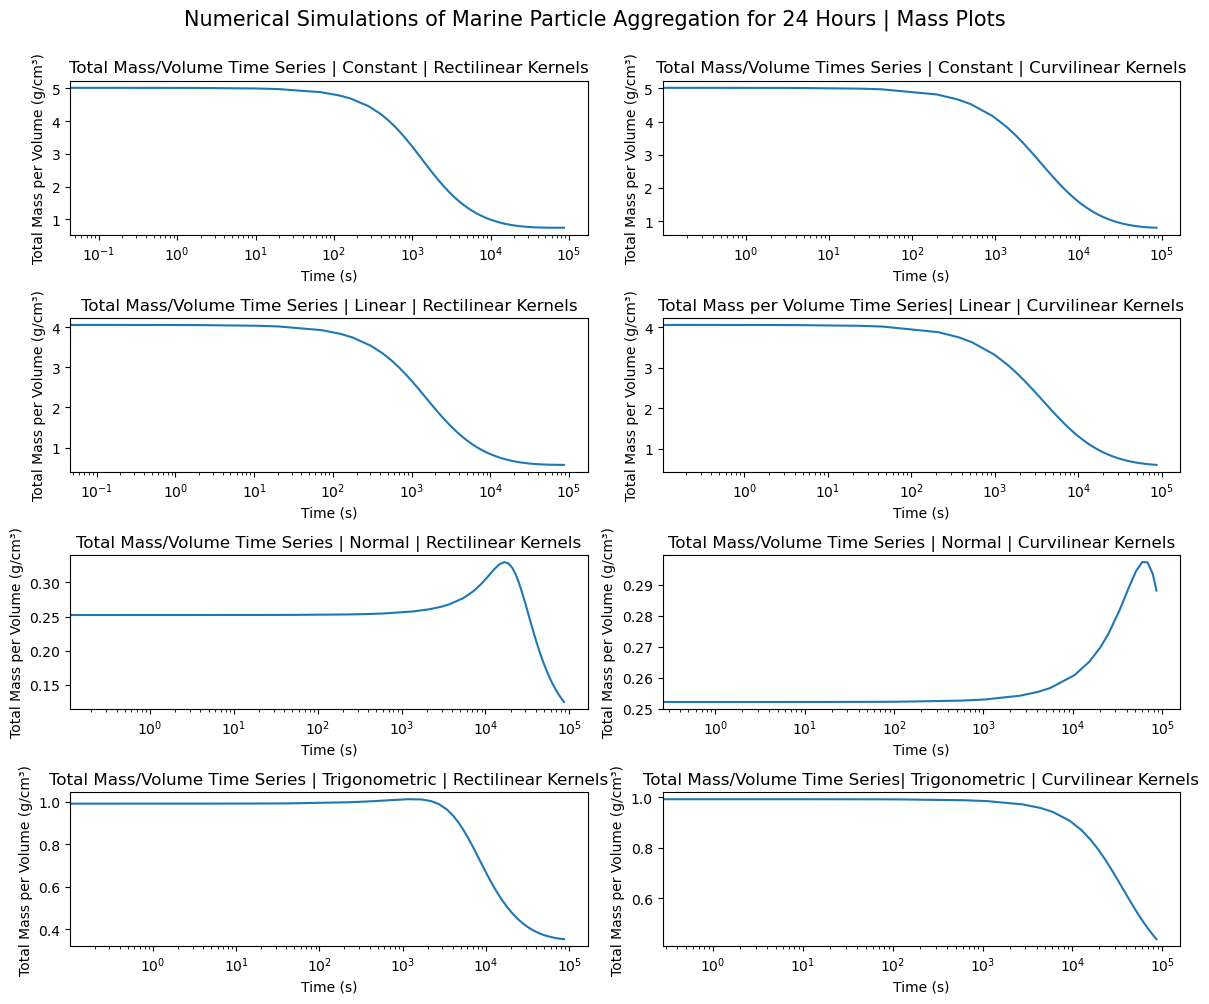

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(12, 10))

plt.suptitle('Numerical Simulations of Marine Particle Aggregation for 24 Hours | Mass Plots', y = 1, fontsize = 15)

#Subplot One - Constant mass Rectilinear
ax[0,0].plot(Constantrec_sol_df.index, C_mass_sums_rec)
ax[0,0].set_xlabel('Time (s)')
ax[0,0].set_xscale('log')
ax[0,0].set_ylabel('Total Mass per Volume (g/cm³)')
ax[0,0].set_title('Total Mass/Volume Time Series | Constant | Rectilinear Kernels')

#Subplot Two - Constant mass with Curvilinear
ax[0,1].plot(Constantcur_sol_df.index, C_mass_sums_cur)
ax[0,1].set_xlabel('Time (s)')
ax[0,1].set_xscale('log')
ax[0,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[0,1].set_title('Total Mass/Volume Times Series | Constant | Curvilinear Kernels')

#Subplot Three - Linear mass Rectilinear
ax[1,0].plot(Linearrec_sol_df.index, L_mass_sums_rec)
ax[1,0].set_xlabel('Time (s)')
ax[1,0].set_xscale('log')
ax[1,0].set_ylabel('Total Mass per Volume (g/cm³)')
ax[1,0].set_title('Total Mass/Volume Time Series | Linear | Rectilinear Kernels')

#Subplot Four - Linear mass Curvilinear
ax[1,1].plot(Linearcur_sol_df.index, L_mass_sums_cur)
ax[1,1].set_xlabel('Time (s)')
ax[1,1].set_xscale('log')
ax[1,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[1,1].set_title('Total Mass per Volume Time Series| Linear | Curvilinear Kernels')

#Subplot Five - Normal mass Rectilinear
ax[2,0].plot(Normalrec_sol_df.index, N_mass_sums_rec)
ax[2,0].set_xlabel('Time (s)')
ax[2,0].set_xscale('log')
ax[2,0].set_ylabel('Total Mass per Volume (g/cm³)')
ax[2,0].set_title('Total Mass/Volume Time Series | Normal | Rectilinear Kernels')

#Subplot Six - Normal mass Curvilinear
ax[2,1].plot(Normalcur_sol_df.index, N_mass_sums_cur)
ax[2,1].set_xlabel('Time (s)')
ax[2,1].set_xscale('log')
ax[2,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[2,1].set_title('Total Mass/Volume Time Series | Normal | Curvilinear Kernels')

#Subplot Seven - Trigonometric mass Rectilinear
ax[3,0].plot(Trigonometricrec_sol_df.index, T_mass_sums_rec)
ax[3,0].set_xlabel('Time (s)')
ax[3,0].set_xscale('log')
ax[3,0].set_ylabel('Total Mass per Volume (g/cm³)')
ax[3,0].set_title('Total Mass/Volume Time Series | Trigonometric | Rectilinear Kernels')

#Subplot Eight - Trigonometric mass with Curvilinear
ax[3,1].plot(Trigonometriccur_sol_df.index, T_mass_sums_cur)
ax[3,1].set_xlabel('Time (s)')
ax[3,1].set_xscale('log')
ax[3,1].set_ylabel('Total Mass per Volume (g/cm³)')
ax[3,1].set_title('Total Mass/Volume Time Series| Trigonometric | Curvilinear Kernels')

plt.tight_layout()
plt.show